Python + Google Colab: Algoritmalar ve Veri Yapıları Eğitimi (Sıfırdan İleriye)    
Ders 18: Python API ve Endpoint Kullanımı

Github Kaynagı:       
https://github.com/acetinkaya/Python-Google-Colab-Algoritmalar-ve-Veri-Yapilari-Egitimi --> D18

Öğr. Gör. Ali ÇETİNKAYA - 2025

In [ ]:
print("Merhaba, Python Veri Yapıları ve Algoritmalar / Ders 18")

Merhaba, Python Veri Yapıları ve Algoritmalar / Ders 18


In [ ]:
import sys  # import python programlama dilinde yazılıma kütüphane eklemeye yarayan bir kod blogudur.
print(sys.version)

3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
from google.colab import drive # google colab - drive bağlantısı

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/My Drive/VERIYAPILARI_PYTHON')

!pwd # bize kodun çıktısını dosya yolu olarak veren kod blogudur.

/content/drive/My Drive/VERIYAPILARI_PYTHON


# Ders 18: Python API ve Endpoint Kullanımı

## API (Application Programming Interface) - Uygulama Programlama Arayüzü  ve ENDPOINT Kavramları Nedir?

API:

Yazılım ile sunucu uygulamaları arasında iletişimi ve veri alışverişini sağlayan bir arayüzdür. Temel olarak, bir API, bir uygulamanın başka bir uygulamanın işlevselliğine veya verilerine erişmesine izin veren bir köprü görevi görmektedir.

API'ler, belirli kurallar ve protokoller üzerinden çalışır, bu sayede iki farklı yazılım sistemi birbirleriyle sorunsuz bir şekilde etkileşime girebilir.
API'ler JSON, XML, CSV, HTML dosya uzantılarında çalışmaktadır.

----

ENDPOINT:

Bir API'nin veya bir web servisin belirli bir işlevine veya veri kaynağına erişim sağlayan URL adresidir. API endpoint'i, API ile dış dünya (kullanıcılar veya diğer sistemler) arasındaki bağlantı noktasıdır. Endpoint'ler, API'nin dış dünyaya sunduğu işlevleri ve verilere erişim sağlayan "kapılar" gibidir. Endpointler JSON, XML, CSV ve HTML dosya uzantılarında çalışmaktadır.

--------------------------------------------------------------------------------

# API ve ENDPOINT kullanım Kolaylığı ve Sağladığı Avantajlar

1. Tekrar Kullanılabilirlik

2. Soyutlama

3. Entegrasyon Kolaylığı

4. Zaman ve Maliyet Tasarrufu

5. Güvenlik ve Kontrol

--------------------------------------------------------------------------------

# ENDPOINT'lerin Kullanım Noktalarına Örnekler ->

1. Finans ve Döviz

2. Hava Durumu

3. Sosyal Medya Paylaşımları

4. E-ticaret ve Ürün Bilgileri

5. Ödeme Sistemleri

6. Haritalar ve Konum Hizmetleri

7. Haber Servisleri

8. Sağlık ve Medikal Veriler

--------------------------------------------------------------------------------

# API'lerin Kullanım Noktalarına Örnekler ->

1. Hava Durumu API'leri -> OpenWeatherMap

2. Banka işlemlerinde Ödeme API'leri -> PayPal

3. Sosyal Medya API'leri -> Twitter API, Facebook API

4. Doğal Dil İşleme API'leri -> OPENAI API

5. Duygu Analizi API'leri -> Microsoft Azure AI

6. Harita Uygulamaları API'leri -> IBB Şehir Haritası API'si

--------------------------------------------------------------------------------

# API ve ENDPOINT Arasındaki Teknik Kullanım Farkı Bulunmaktadır.

API (Application Programming Interface): Bir yazılımın başka bir yazılımla etkileşim kurması için kullanılan genel bir arayüzdür. Bir API, bir dizi kural, metod ve işlev içerir. API, birçok endpoint'i barındıran daha geniş bir kavramdır.

Endpoint: Bir API'nin sunduğu belirli bir veri veya işlev için belirlenen URL'dir. Endpoint, API'yi kullanarak bir işlemi başlatmak veya veri almak için spesifik bir bağlantı noktasıdır.

--------------------------------------------------------------------------------

# Erişim adresleri

* https://openweathermap.org (api)

* https://www.tcmb.gov.tr/kurlar/today.xml (Endpoint)

--------------------------------------------------------------------------------

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup

link_bilgisi = "https://www.tcmb.gov.tr/kurlar/today.xml"
gelen_yanit = requests.get(url=link_bilgisi)

print(gelen_yanit.text)

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="30.04.2025" Date="04/30/2025"  Bulten_No="2025/82" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>38.3684</ForexBuying>
			<ForexSelling>38.4375</ForexSelling>
			<BanknoteBuying>38.3415</BanknoteBuying>
			<BanknoteSelling>38.4952</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>24.4814</ForexBuying>
			<ForexSelling>24.6411</ForexSelling>
			<BanknoteBuying>24.3688</BanknoteBuying>
			<BanknoteSelling>24.7889</BanknoteSelling>
				<CrossRateUSD>1.5636</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit>

In [ ]:
tree = ET.parse(urlopen(link_bilgisi))

root = tree.getroot()

liste = []

liste.append(root.findall('Currency'))

In [ ]:
for i in liste[0]:
  currencyCode = i.get('Kod')
  banknoteBuying = i.find("BanknoteSelling").text
  banknoteSelling = i.find("BanknoteBuying").text

  if currencyCode == "USD":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("USD Banka Alış Satış Arasındaki Kur Farkı ->", result)

  if currencyCode == "EUR":
    print(currencyCode, banknoteBuying, banknoteSelling)
    result = float(banknoteBuying) - float(banknoteSelling)
    print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", result)

USD 36.6557 36.5094
USD Banka Alış Satış Arasındaki Kur Farkı -> 0.14630000000000365
EUR 39.8154 39.6565
EUR Banka Alış Satış Arasındaki Kur Farkı -> 0.1588999999999956


<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="isokur.xsl"?>
<Tarih_Date Tarih="30.04.2025" Date="04/30/2025"  Bulten_No="2025/82" >
	<Currency CrossOrder="0" Kod="USD" CurrencyCode="USD">
			<Unit>1</Unit>
			<Isim>ABD DOLARI</Isim>
			<CurrencyName>US DOLLAR</CurrencyName>
			<ForexBuying>38.3684</ForexBuying>
			<ForexSelling>38.4375</ForexSelling>
			<BanknoteBuying>38.3415</BanknoteBuying>
			<BanknoteSelling>38.4952</BanknoteSelling>
			<CrossRateUSD/>
			<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="1" Kod="AUD" CurrencyCode="AUD">
			<Unit>1</Unit>
			<Isim>AVUSTRALYA DOLARI</Isim>
			<CurrencyName>AUSTRALIAN DOLLAR</CurrencyName>
			<ForexBuying>24.4814</ForexBuying>
			<ForexSelling>24.6411</ForexSelling>
			<BanknoteBuying>24.3688</BanknoteBuying>
			<BanknoteSelling>24.7889</BanknoteSelling>
				<CrossRateUSD>1.5636</CrossRateUSD>
				<CrossRateOther/>
		
	</Currency>
	<Currency CrossOrder="2" Kod="DKK" CurrencyCode="DKK">
			<Unit>

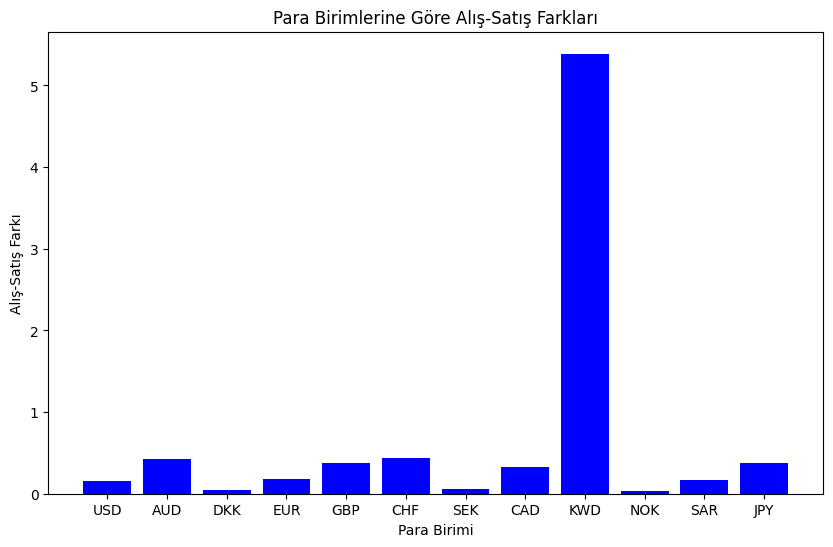

In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Veri kaynağının linki
baglanti_adresi = "https://www.tcmb.gov.tr/kurlar/today.xml"

# Web sitesinden XML verisini alıyoruz
gelen_veri = requests.get(url=baglanti_adresi)
print(gelen_veri.text)  # Verinin içeriğini kontrol amaçlı yazdırıyoruz

# XML verisini parse (çözümleme) ediyoruz
agac = ET.parse(urlopen(baglanti_adresi))
kok = agac.getroot()

# Para birimlerini saklayacağımız listeyi oluşturuyoruz
para_birimleri = []

# Tüm para birimlerini bulup listeye ekliyoruz
para_birimleri.append(kok.findall('Currency'))

# Para birimleri üzerinde döngü ile işlem yapıyoruz
for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')  # Para birimi kodunu alıyoruz
    alisFiyati = i.find("BanknoteSelling").text  # Alış fiyatını alıyoruz
    satisFiyati = i.find("BanknoteBuying").text  # Satış fiyatını alıyoruz

    # USD için işlem yapıyoruz
    if paraBirimiKodu == "USD":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("USD Banka Alış Satış Arasındaki Kur Farkı ->", fark)

    # EUR için işlem yapıyoruz
    if paraBirimiKodu == "EUR":
        print(paraBirimiKodu, alisFiyati, satisFiyati)
        fark = float(alisFiyati) - float(satisFiyati)
        print("EUR Banka Alış Satış Arasındaki Kur Farkı ->", fark)

# Verileri pandas DataFrame olarak saklama
veri = {
    'Para Birimi': [],
    'Alış Fiyatı': [],
    'Satış Fiyatı': [],
    'Fark': []
}

for i in para_birimleri[0]:
    paraBirimiKodu = i.get('Kod')
    alisFiyati = i.find("BanknoteSelling").text
    satisFiyati = i.find("BanknoteBuying").text
    if alisFiyati is not None and satisFiyati is not None:
        fark = float(alisFiyati) - float(satisFiyati)
        veri['Para Birimi'].append(paraBirimiKodu)
        veri['Alış Fiyatı'].append(float(alisFiyati))
        veri['Satış Fiyatı'].append(float(satisFiyati))
        veri['Fark'].append(fark)

df = pd.DataFrame(veri)

# Pandas DataFrame verilerini görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(df['Para Birimi'], df['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('Para Birimlerine Göre Alış-Satış Farkları')
plt.show()

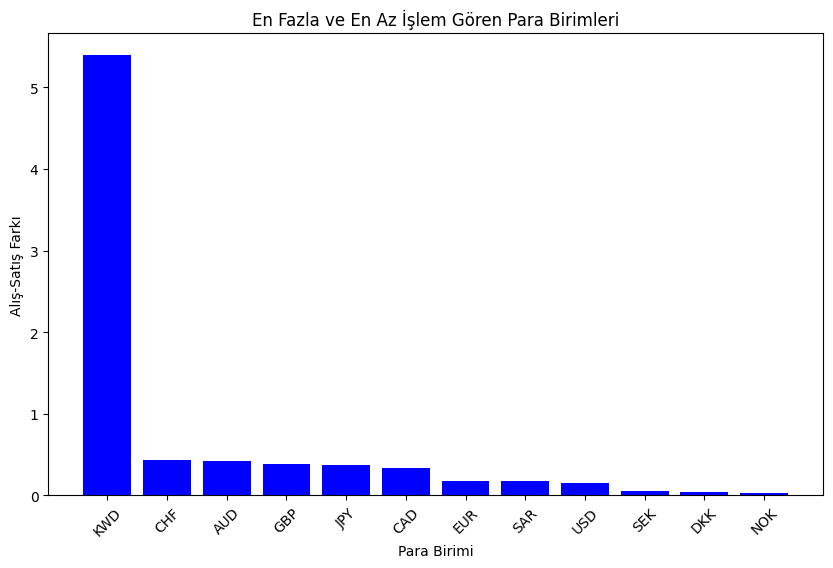

In [ ]:
# Verileri alış-satış farkına göre büyükten küçüğe sıralıyoruz
df_sorted = df.sort_values(by='Fark', ascending=False)

# Pandas DataFrame verilerini görselleştirme (Sıralanmış Hali)
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Para Birimi'], df_sorted['Fark'], color='blue')
plt.xlabel('Para Birimi')
plt.ylabel('Alış-Satış Farkı')
plt.title('En Fazla ve En Az İşlem Gören Para Birimleri')
plt.xticks(rotation=45)  # Para birimi isimlerinin daha iyi görünmesi için
plt.show()

In [ ]:
# CSV dosyasına kaydetme

df_sorted.to_csv('kur_verileri_siralama-30042025.csv', index=False)

print("Veriler 'kur_verileri_siralama-30042025.csv' dosyasına kaydedildi.")

Veriler 'kur_verileri_siralama-30042025.csv' dosyasına kaydedildi.


# API Kullanımı ve Veri Entegrasyonu

OpenWeather API, dünya genelindeki herhangi bir konum için günlük, saatlik ve geçmişe dönük hava durumu verilerine hızlı ve etkili bir şekilde erişim sağlar.

Profesyonel veri işlemleri sayesinde; anlık hava durumu, kısa ve uzun vadeli tahminler ile birlikte geçmişe yönelik analizler yapılabilir.

API, 30 güne kadar uzanan iklim tahmin verilerini de toplu şekilde sunabilir.
Tüm veriler JSON ve XML formatlarında sağlanmakta olup, bu veriler Python ortamında kolaylıkla işlenebilir. Bu API ile alınabilecek bilgi içerikleri

1. Şimdiki güncel hava durumu
2. Güncel hava durumunun 1 saatlik tahmini
3. Güncel hava durumunun 48 saatlik tahmini
4. Güncel hava durumunun 8 günlük tahmini
5. Bir tarih sürecine göre hava durumu verileri -> 45 yıl geriye - 4 gün ileriye dönük tahmini
6. Ulusal hava durumu uyarıları -> Mevcut tüm verilerlerden yola çıkarak
7. 45 yıl geriye - 1,5 yıl ileriye yönelik günlük toplam bilgi ve tahmin
8. Hava durumu özeti


Ücretli API Bağlantı Noktası: API 3.0

Ücretsiz API Bağlantı Noktası: API 2.5

https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}


Standart Bağlatıya Örnekler->
1. api.openweathermap.org/data/3.0/onecall?lat=30.489772&lon=-99.771335
2. api.openweathermap.org/data/3.0/onecall?lat=30.489772&lon=-99.771335&units=metric
3. api.openweathermap.org/data/3.0/onecall?lat=30.489772&lon=-99.771335&units=imperial

Avcılar 40.979168 enlem ve 28.721390 boylamda yer almaktadır. Avcılar ilçesine bağlıdır. Avcılar haritası İstanbul ili içinde nerede olduğu harita merkezinde gösterilmektedir. Avcılar GPS koordinatları 40° 58´ 45.0048" ve 28° 43´ 17.0040".


In [33]:
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi (ücretsiz sürüm için)
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler (şehir adı, API anahtarı ve metrik sistem)
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme örnekleri
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

    except requests.exceptions.RequestException as err:
        print("Hata oluştu: " + str(err))

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ") # API KEY sizin OpenWeatherMap üyeliğiniz sonrasında oluşturulan anahtardır.

    # Hava durumu bilgilerini alma fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)

Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: 1b849b527d42357659b98bb5ff2f8612
Hava Durumu Bilgisi - istanbul
Sıcaklık: 9.98 °C
Nem Oranı: 71%
Açıklama: broken clouds


Hava durumu bilgisini almak istediğiniz şehir adını girin: istanbul
OpenWeatherMap API anahtarınızı girin: 1b849b527d42357659b98bb5ff2f8612
Hava Durumu Bilgisi - istanbul
Sıcaklık: 9.98 °C
Nem Oranı: 71%
Açıklama: broken clouds


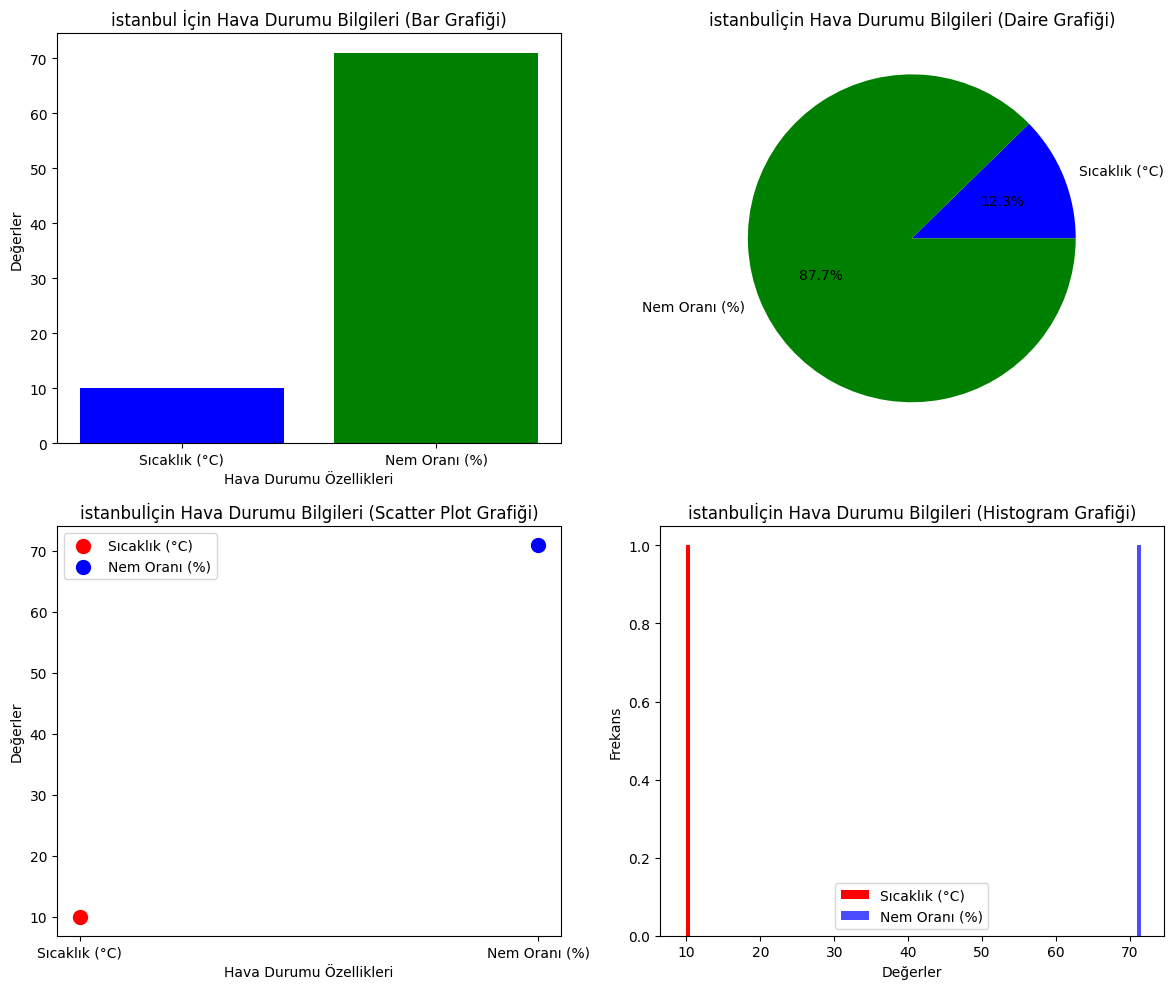

In [34]:
# pip install requests, matplotlib

import requests
import matplotlib.pyplot as plt

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

        # Hava durumu verilerini bir dictionary'de saklıyoruz
        veri = {
            "Sıcaklık (°C)": hava_durumu['main']['temp'],
            "Nem Oranı (%)": hava_durumu['main']['humidity']
        }

        # Bar Grafiği
        plt.figure(figsize=(12, 10))

        plt.subplot(2, 2, 1)  # 2x2 grid, 1. grafik
        plt.bar(veri.keys(), veri.values(), color=['blue', 'green'])
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(sehir + " İçin Hava Durumu Bilgileri (Bar Grafiği)")

        # Daire Grafiği (Pie Chart)
        plt.subplot(2, 2, 2)  # 2x2 grid, 2. grafik
        plt.pie(veri.values(), labels=veri.keys(), autopct='%1.1f%%', colors=['blue', 'green'])
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Daire Grafiği)")

        # Scatter Plot (Dağılım Grafiği) - İki Farklı Renk
        plt.subplot(2, 2, 3)  # 2x2 grid, 3. grafik
        plt.scatter(['Sıcaklık (°C)'], [veri['Sıcaklık (°C)']], color='red', s=100, label='Sıcaklık (°C)')
        plt.scatter(['Nem Oranı (%)'], [veri['Nem Oranı (%)']], color='blue', s=100, label='Nem Oranı (%)')
        plt.xlabel('Hava Durumu Özellikleri')
        plt.ylabel('Değerler')
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Scatter Plot Grafiği)")
        plt.legend()

        # Histogram - Ayrı Ayrı Gösterim
        plt.subplot(2, 2, 4)  # 2x2 grid, 4. grafik
        plt.hist([veri['Sıcaklık (°C)']], bins=2, color='red', label='Sıcaklık (°C)')
        plt.hist([veri['Nem Oranı (%)']], bins=2, color='blue', label='Nem Oranı (%)', alpha=0.7)
        plt.xlabel('Değerler')
        plt.ylabel('Frekans')
        plt.title(sehir + "İçin Hava Durumu Bilgileri (Histogram Grafiği)")
        plt.legend()

        plt.tight_layout()
        plt.show()

    except requests.exceptions.RequestException as err:
        print(f"Hata oluştu: {err}")

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ") # API KEY sizin OpenWeatherMap üyeliğiniz sonrasında oluşturulan anahtardır.

    # Hava durumu bilgilerini alma ve görselleştirme fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)